# Classification Predict - Climate Change Belief Analysis Challenge
© Explore Data Science Academy

---
### Honour Code

We, **J.GAD AI** {**#Team_ND2**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>

## Table of Contents

#### Section 1: Data Pre-processing

<a href=#one>1.1 Importing Packages</a>

<a href=#two>1.2 Loading Data</a>

<a href=#three>1.3 Exploratory Data Analysis (EDA)</a>

<a href=#four>1.4 Data Engineering</a>

#### Section 2: Model Development and Analysis

<a href=#five>2.1 Modeling</a>

<a href=#six>2.2 Model Performance</a>

#### Section 3: Model Explanation and Conclusions

<a href=#seven>3.1 Model Explanations</a>

<a href=#seven>3.2 Conclusions</a>

# Introduction
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies. This Notebook has been so adapted and developed by **J.GAD AI** - a group of five students from the July 2022 cohort of the Explore Ai Academy **Data Science** course. We are:

 > David Mugambi <br>
 > Gavriel Leibovitz <br>
 > Josiah Aramide <br>
 > Aniedi Oboho-Etuk <br>
 > Joy Obukohwo <br>
 

### Problem Statement

The client is determined to improve its customized service provision to targeted consumer categories based on their climate change belief and broad-based sentiments. 

The novel tweet data of consumers available to the company contains some classification of tweets within a belief spectrum from not believing in man-made climate change on one end to supporting the belief of man-made climate change, on the other end. Also, this data spans multiple demographic and geographic categories of Twitter users. 

By applying data science processes and advanced modeling techniques, **the J.GAD AI** team can provide an accurate and robust solution to this classification task of determining whether or not a person believes in climate change. This solution can help give the company access to a broad base of consumer sentiments, thus increasing their insights and informing future marketing strategies.


### Objectives

**J.GAD AI** seeks to achieve the following objectives for the project brief:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting how people perceive climate change;
- 5. evaluate the accuracy of the best machine learning model; and
- 6. explain the inner working of the model to a non-technical audience.

# Section 1: Data Pre-processing

This section describes steps for installing dependencies and requirements, initializing the experiment on Comet, importing packages, loading the two datasets - train and test datasets, conducting the exploratory data analysis (EDA) and implementing data engineering.

 <a id="one"></a>
## 1.1 Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Below are the libraries and tools imported for use in this project. The libraries include:
   - **numpy**: for working with arrays,
   - **pandas**: for tansforming and manipulating data in tables,
   - **matplotlib**: for creating interactive visualisations,
   - **seaborn**: for making statistical graphs and plots,
   - **nltk**: for natural language processing,
   - **scikit-learn**: for machine learning and statistical modeling,
   - **imblearn**: for resampling the dataset, and
   - **math**: for algebraic notations and calculations.

---

In [2]:
# Comet installation for Jupyter Notebook/Collab
!pip install comet_ml

# NLTK installation
!pip install nltk

# Keras installation
!pip install keras

# WordCloud installation
!pip install wordcloud

# Imbalanced learn installation
!pip install imbalanced-learn
#conda install -c conda-forge imbalanced-learn
#conda install -c glemaitre imbalanced-learn

In [180]:
# Libraries for data loading, data manipulation and data visulisation 
import numpy as np   # for working with 
import pandas as pd  # for data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for making visualisations and plots
from wordcloud import WordCloud
import seaborn as sns
import pickle
%matplotlib inline

# Libraries for collecting experiment parameters
import warnings
warnings.filterwarnings("ignore")
import comet_ml
from comet_ml import Experiment

# Libraries for preprocessing of text data
# Libraries for data engineering and model building
import string
import re
import nltk
from collections import Counter
from nltk.tokenize import sent_tokenize 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn import under_sampling
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Libraries for Classifier Models
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression #determine mutual info
from sklearn.datasets import make_blobs

# Libraries for model performance (metrics)
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import math
import time
import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="npvXxfHo9yuauBoypadPfWyBi",
    project_name="classification-predict",
    workspace="teamnd2",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/teamnd2/classification-predict/0d52d91b153246bab159207e4cdaaa31



In [6]:
# download nltk tools for dropping stop words
nltk.download(['punkt','stopwords','omw-1.4','wordnet'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/josaramide/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josaramide/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/josaramide/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/josaramide/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Carbon emissions!!! Is it just a buzz? Is there a thing as Climate Change or Global Warming? The exercise in this Notebook will find out what Twitter users think!

<a id="two"></a>
## 1.2 Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, we load the data from the . |

---

In [8]:
# Store datasets in a Pandas Dataframe
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

<a id="three"></a>
## 1.3 Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we perform an in-depth analysis of all the features |

---

First, it is necessary to view the matrix of the train and test datasets to see the total number of rows and features they both contain.

In [9]:
# Train dataset Matrix
df_train.shape

(15819, 3)

In [10]:
# Test dataset Matrix
df_test.shape

(10546, 2)

### OBSERVATION
- As the results show, the train dataset contains **15,819 rows of observations** in 3 columns of features and the target (or response) variable, 
- The test dataset contains a much lower number of observations (**10,546**) with only 2 columns i.e. not containing the target variable. 

Next, a peek view of some of the rows in the dataset should be of interest. This can be accomplished with the `pd.head()` command as seen in the code cell below. The command can take an argument specifying the number of rows to view (15 in this example), otherwise it returns the first 5 rows by default. 

In [11]:
# View top of datasets, train set

df_train.head(15)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


In [12]:
# looking at the test set
df_test.head(10)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
5,RT @nycjim: Trump muzzles employees of several...,75639
6,@bmastenbrook yes wrote that in 3rd yr Comp Sc...,211536
7,RT @climatehawk1: Indonesian farmers weather #...,569434
8,RT @guardian: British scientists face a ‘huge ...,315368
9,Aid For Agriculture | Sustainable agriculture ...,591733


The ongoing analysis may stoke interest in knowing the lengths of these tweet messages or the keywords they contain. This can be addressed by taking a deeper look at the train dataset from here onwards. Once adequate insights have been gathered from the train dataset, the information will inform the processes involved in the section on feature engineering and these same processes/steps can likewise be applied to the test dataset prior to the modeling stage.

In [13]:
# Data Types and Non-null count 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [14]:
# Confirm the Non-null count
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [15]:
# Summary Statistics of our train dataset
df_train.groupby('sentiment').describe().T

sentiment                 -1              0              1              2
tweetid count    1296.000000    2353.000000    8530.000000    3640.000000
        mean   499169.447531  496550.249894  507418.550762  492613.500275
        std    289509.003781  286519.834520  289537.581404  289163.550697
        min      1422.000000     229.000000       6.000000      86.000000
        25%    243479.250000  250733.000000  257622.750000  246628.250000
        50%    494572.000000  483496.000000  511867.500000  490980.000000
        75%    759714.750000  734897.000000  761983.500000  738188.500000
        max    999537.000000  999888.000000  999698.000000  999236.000000

### OBSERVATION
- From above, it can be observed that the dataset appears to have no missing values. That is, the count of non-null rows equals the expected count of entries in the columns. Taking a deeper dive to see the statistical information reveals a summary of all the class descriptions known as `sentiments` - -1, 0, 1, and 2.

Now, the analysis can proceed into visualizations, starting with a bar plot, to show some of the classification groups and to see how many data samples, or tweet `messages`, are recorded for each of the class description, or `sentiment` as explained below:
- Class 2 (News): the tweet links to factual news about climate change;
- Class 1 (Pro): the tweet supports the belief of man-made climate change;
- Class 0 (Neutral): the tweet neither supports nor refutes the belief of man-made climate change; and
- Class -1 (Anti): the tweet does not believe in man-made climate change Variable definitions.

These visuals will be expressed as a BarChart and a PieChart to reflect the percentages of observations in each of the sentiment classes. Then, a new visual that investigates the distribution or spread of the dataset is explored.

#### Visualisation: Histogram of the Sentiment Classes

[-1, 0, 1, 2]


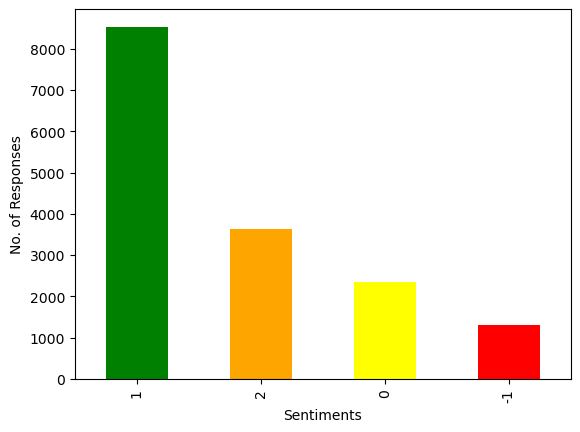

In [16]:
# Exploring our class description - the categorical variable 'sentiment'
type_labels = list(df_train.sentiment.unique())
type_labels.sort()
print(type_labels)

df_train['sentiment'].value_counts().plot(kind = 'bar', color=['green', 'orange', 'yellow', 'red'])
plt.xlabel('Sentiments')
plt.ylabel('No. of Responses')
plt.show()

#### Visualisation: PieChart of the Sentiment Classes

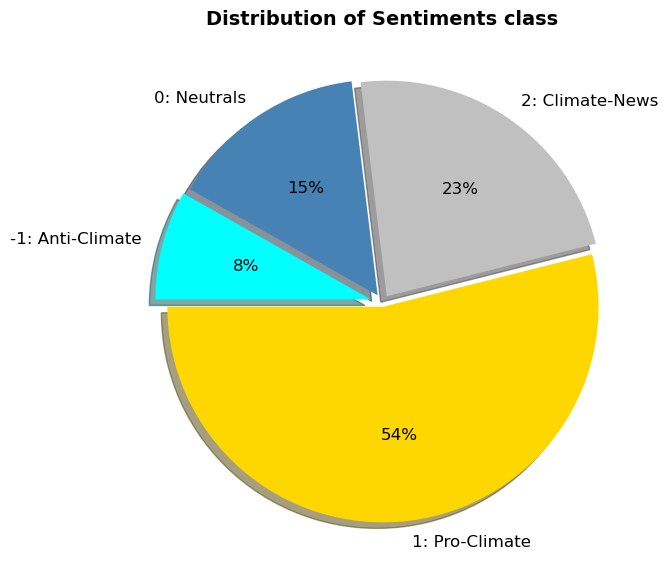

In [17]:
# Defining colors for the pie chart
colors = ['gold', 'silver', 'steelblue','cyan']
plt.rcParams.update({'font.size': 12})
  
# Define the ratio of gap of each fragment in a tuple
labels = '1: Pro-Climate', '2: Climate-News', '0: Neutrals', '-1: Anti-Climate'
explode = (0.02, 0.035, 0.04, 0.055)
pie_plot=df_train['sentiment'].value_counts().plot(kind = 'pie', ylabel='', \
                                                   autopct='%1.0f%%',\
                                                   colors=colors,explode=explode,\
                                                   labels=labels, shadow = True,
          startangle = 180,figsize=(7,7))
  
# displaying chart
pie_plot.set_title("Distribution of Sentiments class", weight='bold', size=14)
plt.show()

In [18]:
# confirming the class distribution in the training dataset
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

### OBSERVATION
 - One immediately obvious fact from the unclean dataset is that there is obvious variation in the count of the sentiments, in other words, the train dataset is **unbalanced** in the response variable classification, as should be expected from real world data.
 - The above visual shows that **about 8,500 tweet messages** (more than half or **54%** of our dataset) support the belief of man-made climate change (i.e. Class 1), 
 - just **around 3,600 tweet messages** (or **24%**) link to factual news about climate change, 
 - a little above **2,300 tweets**  (or **15%**) neither support nor refute the belief of man-made climate change,
 - while only **about 1,300 tweets** (or **8%**) are in the class of not believing in man-made climate change. 

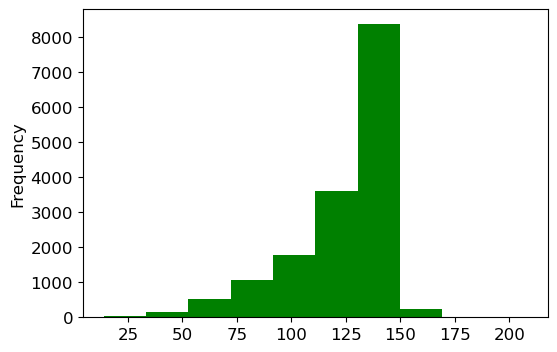

In [19]:
# checking the distribution of tweets in the data

length_train = df_train['message'].str.len().plot.hist(color = 'green', figsize = (6, 4))

### OBSERVATION
- From the visual above, it is clear that the train dataset has a right modal or is negatively skewed. This means that there are more text data concentrated on the right side of the distribution and so the mean and median will be less than the mode. 

- Furthermore, it is important to also have a view of the keyword count in the train dataset (tweet messages) to see the most common keywords. 

This can be easily achieved by doing a quick clean of our dataset using the CounterVectorizer. The CountVectorizer is a great built-in tool available from the scikit-learn library in Python. It has a text feature extraction module called CountVectorizer that can be used to clean `stopwords` and transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. The following code lines use the CountVectorizer, the frequency count along with barplot to show a visual of the **30 most common keywords** in the message column of the train dataset.

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

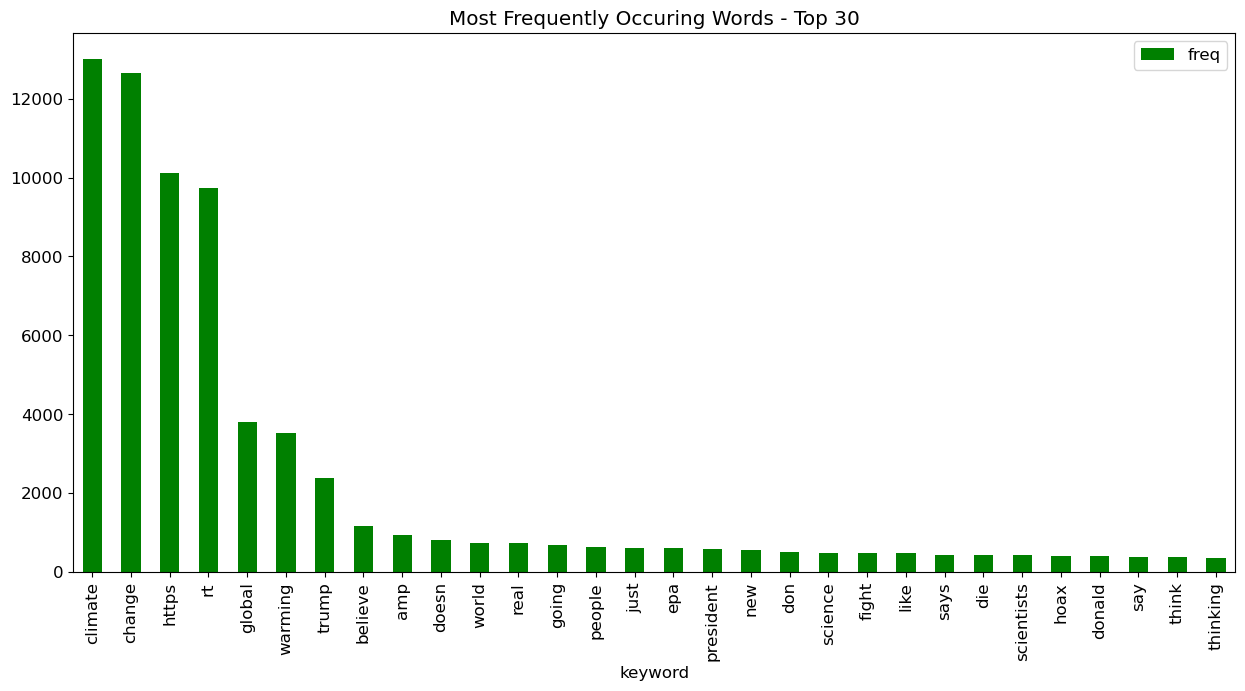

In [20]:
# instantiate CountVectorizer
word_vect = CountVectorizer(stop_words = 'english')
keywords = word_vect.fit_transform(df_train.message)

total_words = keywords.sum(axis=0)

keywords_freq = [(keyword, total_words[0, i]) for keyword, i in word_vect.vocabulary_.items()]
keywords_freq = sorted(keywords_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(keywords_freq, columns=['keyword', 'freq'])

frequency.head(30).plot(x='keyword', y='freq', kind='bar', figsize=(15, 7), color = 'green')
plt.title("Most Frequently Occuring Words - Top 30")

### OBSERVATION
Given the output above, the following insights on **outliers** can be derived:
- the top two words `climate` and `change` appear more than 12,000 times each. This should not be surprising since the context of this exercise is exactly concerning these two words;
- the next two words appear almost 10,000 times each;
- the top 7 keywords appear at least 2,000 times or more; while
- the rest of the dataset contains low-frequency words like `believe`, `world`, `new`, `fight`, `donald`, and `thinking`. 

However, it immediately becomes obvious from the insight that some of these high-frequency words like `https` and `rt` do not necessarily add meaning to our dataset aside providing a hint of customers sharing news URLs or retweeting messages on the subject matter. One way to deal with these words is to clean them from the dataset in the next section, that is, during our feature engineering. Thus, the following words will likely be removed as **noise or outliers** during feature engineering:
- http
- rt
- climate
- change

The above information from the train dataset surely invites one more type of visual analysis before moving fully into the feature engineering stage. This visual is known as a **WordCloud** and it is plotted to show a quick view of the all the words in the train dataset. The most legible words represent the words used mostly throughout the dataset.

The **WordCloud** can be plotted on any of the dataframes. First, the view of all words in the tweets are explored followed by words from each of the tweet sentiment classes - `Anti`, `Neutrals`, `Pro-Climate`, `News`

#### Visualisation: Building WordClouds of the Most Common words in Tweets

In [21]:
# extract keywords according to news sentiments==2
news_keywords = df_train['message'][df_train['sentiment']==2]
news_df = pd.DataFrame(news_keywords)

# extract keywords according to pro-climate change sentiments==1
pro_keywords = df_train['message'][df_train['sentiment']==1]
pro_df = pd.DataFrame(pro_keywords)

# extract keywords according to neutrals sentiments==0
neu_keywords = df_train['message'][df_train['sentiment']==0]
neu_df =pd.DataFrame(neu_keywords)

# extract keywords according to anti climate change sentiments==-1
anti_keywords = df_train['message'][df_train['sentiment']==-1]
anti_df=pd.DataFrame(anti_keywords)

Text(0.5, 1.0, 'WordCloud - Consumer Climate Sentiments')

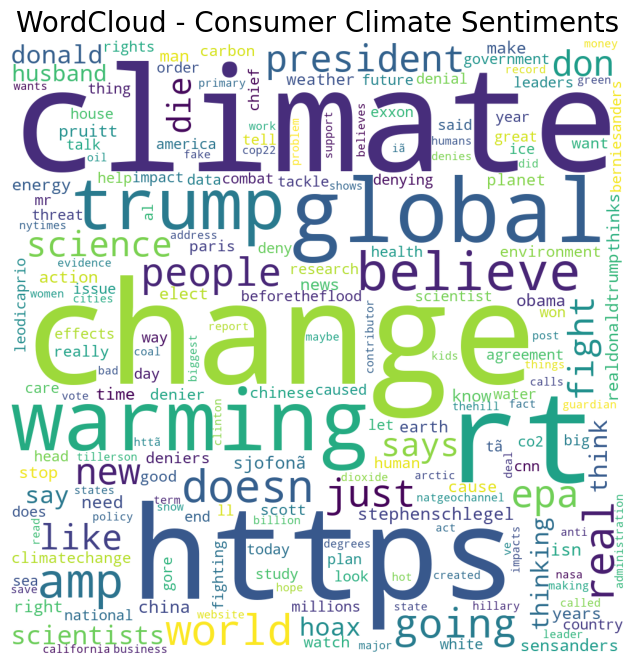

In [22]:
kw_cloud = WordCloud(background_color = 'white', width = 1000, height = 1000) \
                .generate_from_frequencies(dict(keywords_freq))

plt.figure(figsize=(10,8))
plt.imshow(kw_cloud)
plt.axis("off")
plt.title("WordCloud - Consumer Climate Sentiments", fontsize = 20)

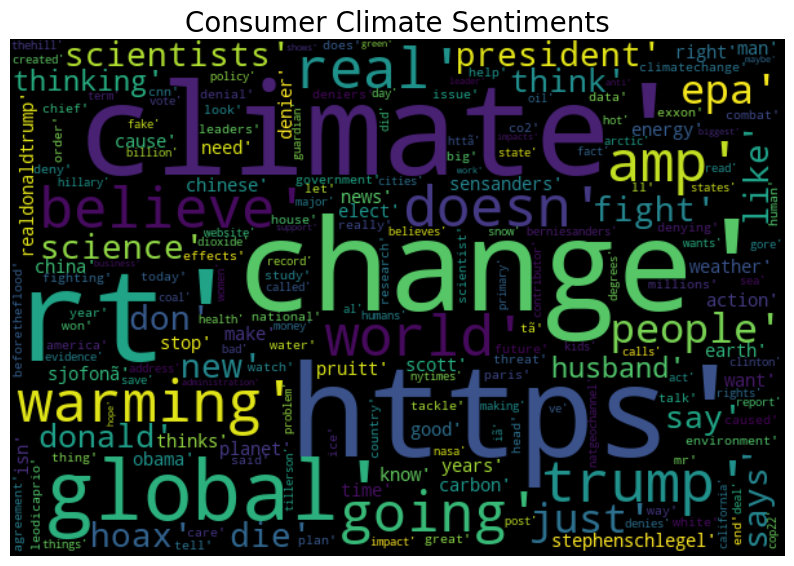

In [23]:
kw_cloud2 = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(str(keywords_freq))

plt.figure(figsize=(10, 7))
plt.imshow(kw_cloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Consumer Climate Sentiments", fontsize = 20)

x, y = np.ogrid[:300, :300]
mask = (x - 160) ** 2 + (y - 160) ** 2 > 170 ** 2
mask = 255 * mask.astype(int)


### OBSERVATION
 - The two visuals above confirm the insights already reported on the most common words. 
 - From the first plot on white background, at least 7 words immediately become obvious to the reader's quick scan. They are: `climate`, `change`, `https`, `rt`, `global`, `warming`, and `trump`. 
 - On the other hand, the dark canvas theme provides the right contrast to enable more words to be viewed from the dataset, all the way to the tiny ones. 

All these words, with the exception of the two linked to news information on the subject matter, reflect the popular sentiments of the people talking about climate change.

#### Wordclouds of the sentiment classes
Building a function for the **WordCloud** across different Classes

In [24]:
def word_cloud(keyw, label):   
    word_vect = CountVectorizer(stop_words = 'english')
    keywords = word_vect.fit_transform(keyw.message)
    total_words = keywords.sum(axis=0)

    keywords_freq = [(keyword, total_words[0, i]) for keyword, i in word_vect.vocabulary_.items()]
    keywords_freq = sorted(keywords_freq, key = lambda x: x[1], reverse = True)
    frequency = pd.DataFrame(keywords_freq, columns=['keyword', 'freq'])

    kw_cloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(str(keywords_freq))
    
    x, y = np.ogrid[:300, :300]
    mask = (x - 160) ** 2 + (y - 160) ** 2 > 170 ** 2
    mask = 255 * mask.astype(int)

    plt.figure(figsize=(10,8))
    b = plt.imshow(kw_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(label, fontsize = 14, weight='bold')

    return b

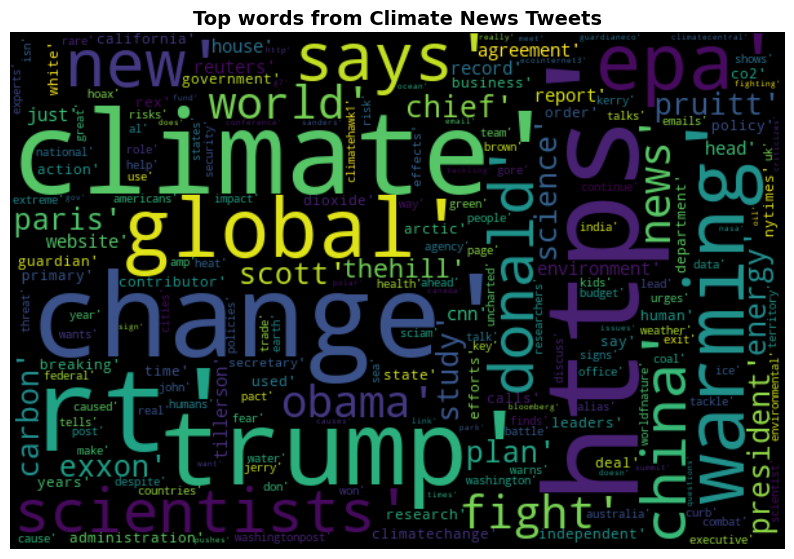

In [25]:
word_cloud(news_df, label='Top words from Climate News Tweets')

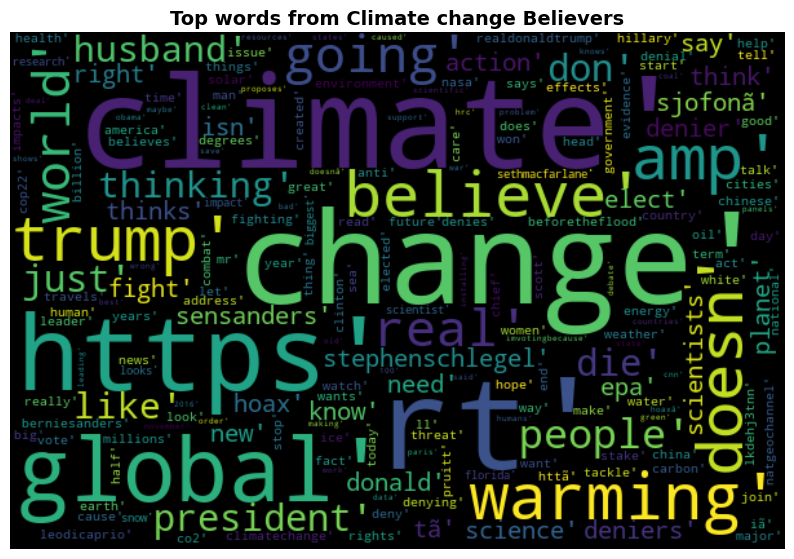

In [26]:
word_cloud(pro_df, label='Top words from Climate change Believers')

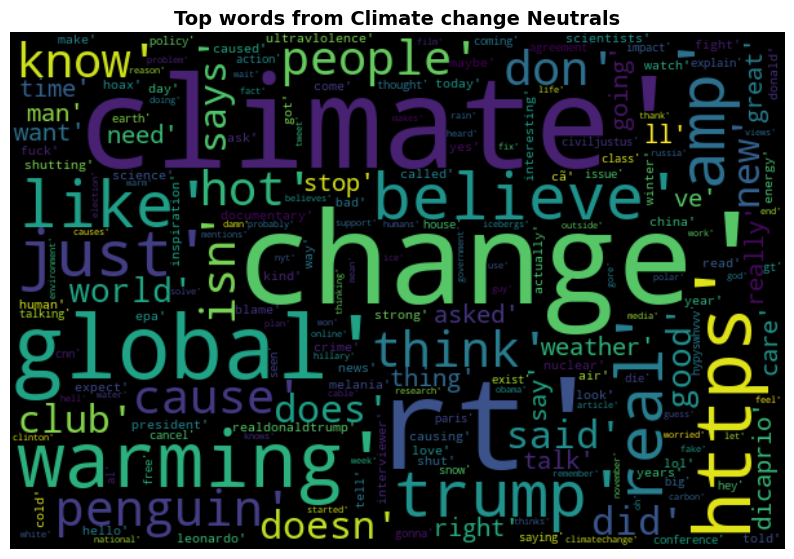

In [27]:
word_cloud(neu_df, label='Top words from Climate change Neutrals')

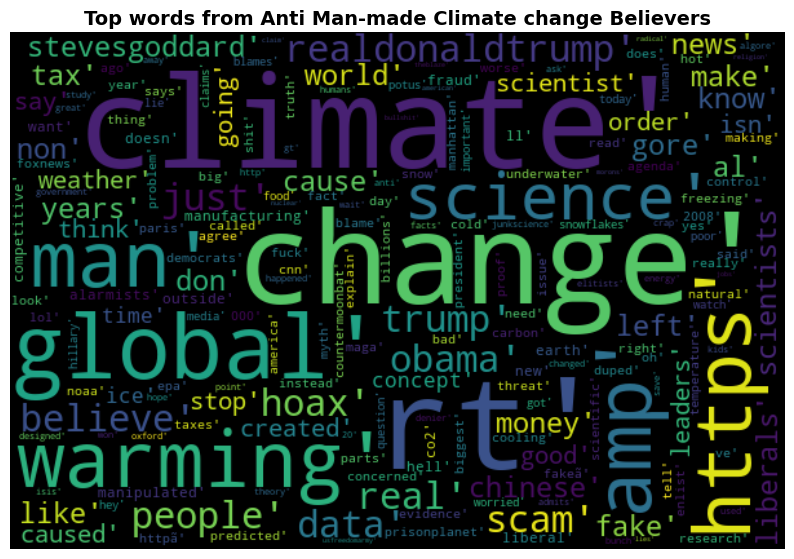

In [28]:
word_cloud(anti_df, label='Top words from Anti Man-made Climate change Believers')

In [29]:
# create a function to collect the hashtags from the dataset
def hashtag_extract(word):
    
    hashtags = [(re.findall(r"#(\w+)", char)) for char in word]

    return hashtags

In [30]:
# make a list of all the hashtags according to the sentiment class
# extracting hashtags from news messages
hash_news = hashtag_extract(df_train['message'][df_train['sentiment'] == 2])

# extracting hashtags from pro-climate change supporters
hash_pro = hashtag_extract(df_train['message'][df_train['sentiment'] == 1])

# extracting hashtags from neutrals
hash_neut = hashtag_extract(df_train['message'][df_train['sentiment'] == 0])

# extracting hashtags from anti-climate change people
hash_anti = hashtag_extract(df_train['message'][df_train['sentiment'] == -1])

# summing up to unnest list
hash_news = sum(hash_news,[])
hash_pro = sum(hash_pro,[])
hash_neut = sum(hash_neut,[])
hash_anti = sum(hash_anti,[])

In [31]:
# create a function to get barplot of all the hashtags by sentiment class
def hashtag_dist(hashtag, label):
    freq_dist = nltk.FreqDist(hashtag)
    freq_df = pd.DataFrame({'Hashtag': list(freq_dist.keys()),
                            'Count': list(freq_dist.values())})

    # selecting top 10 most frequent hashtags     
    freq_df = freq_df.nlargest(columns="Count", n = 10) 
    plt.figure(figsize=(16,5))
    ax = sns.barplot(data=freq_df, x= "Hashtag", y = "Count")
    ax.set(ylabel = 'Count')
    plt.title(label=label, fontsize = 16)
    res = plt.show()
    
    return res

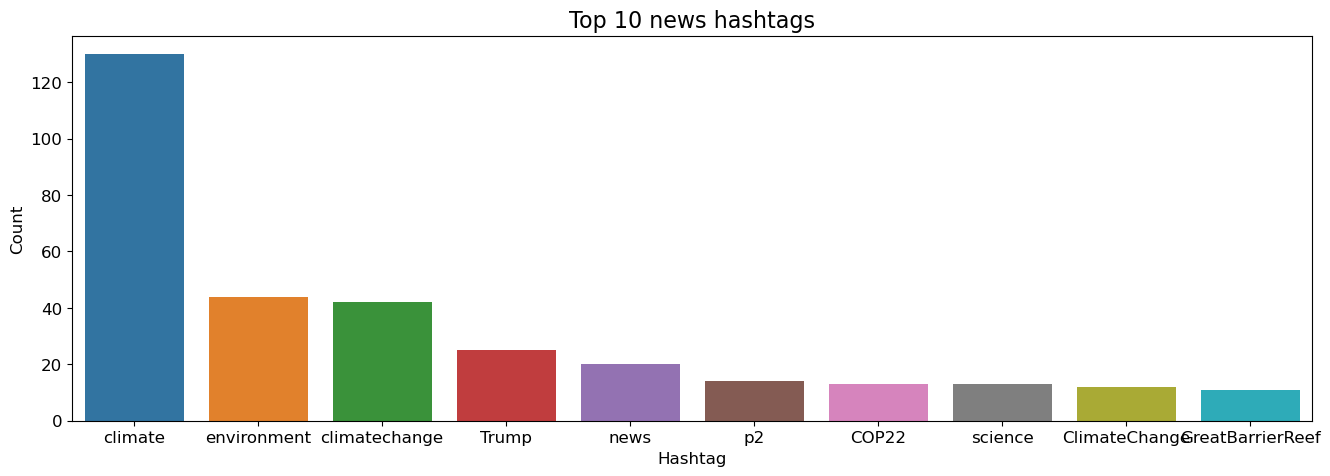

In [32]:
train_news_plot = hashtag_dist(hash_news, "Top 10 news hashtags")

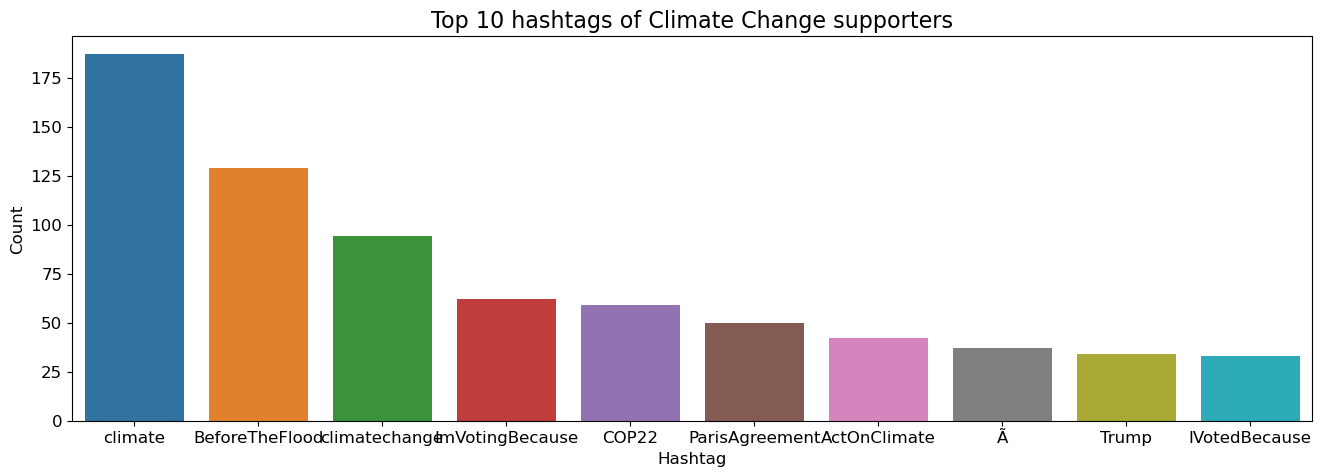

In [33]:
train_pro_plot = hashtag_dist(hash_pro, "Top 10 hashtags of Climate Change supporters")

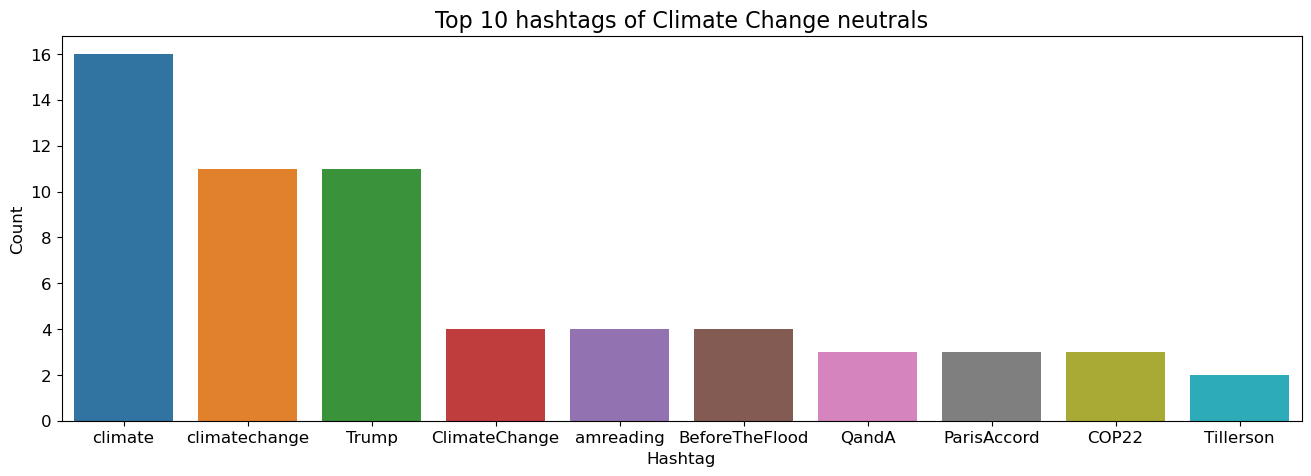

In [34]:
train_neut_plot = hashtag_dist(hash_neut, "Top 10 hashtags of Climate Change neutrals")

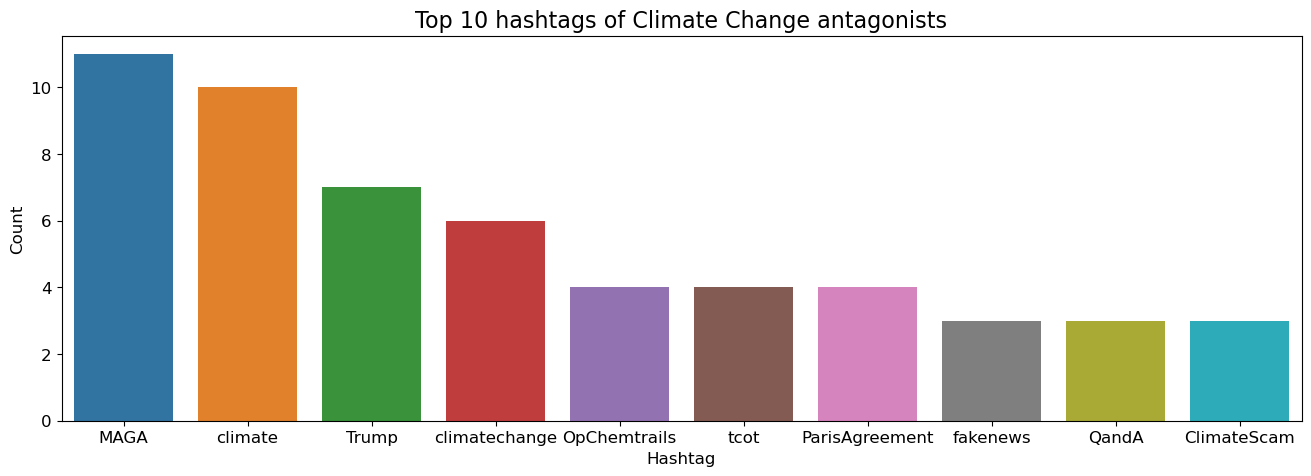

In [35]:
train_anti_plot = hashtag_dist(hash_anti, "Top 10 hashtags of Climate Change antagonists")

### OBSERVATION
- 
- 


For now, this seems to be as much as can be displayed from the raw dataset. However, upon adequately cleaning the dataset, further exploratory data analysis can be conducted for additional insights.

The following section details how to achieve just that!

<a id="four"></a>
## 1.4 Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we conduct our feature engineering to: clean the dataset, and create new features - as identified in the EDA phase. Later, we initiate some ... |

---

#### 1.4.1 Preparing the text corpus for modeling: cleaning, vectorization, standardization and splitting

The first step is to begin organising the data cleaning exercise by building smart functions so that these can be recalled for cleaning both the training and testing datasets. Without this logical flow of cleaning the data, the exercise can quickly get very messy. However, with a couple of functions, it can be decided where the code lines will be inserted for repetitive tasks such as removal of noise i.e. punctuations, special characters, usernames, urls etc. Then, the cleaning exercise can logically progress to tokenization, lemmatization and removal of duplicates as shown below. 

These function are called to clean the sample dataframe, returning a new column of clean messages. This new column is contained in a copy of the original dataset to avoid integrity loss of the original dataframe.

The text corpus extracted from the newly created column is passed into another function that performs vectorization of the words (features) into numerical form. Next, the datasets are resampled to remove the imbalance observed during the exploratory data analysis. This is followed by standardization to ensure these features are of similar scale, and splitting to make our features available for training and validation during the modeling phase of the classification task.

In [36]:
# create a function to do some preprocessing on the data
def clean_message(message):
    '''
    :parameter
        :param message: str - name of column containing text to be cleaned
    :return
        cleaned message
    '''
    # remove the noise - urls, punctuations, characters, change to lower case, then strip
    print ('Lowering case, stripping whitespace and removing URLs...')
    message = re.sub(r'(@[a-zA-Z]+\w+)|[^\w\s]|http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]  \
                     |(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', '', str(message).lower().strip())

    # tokenize (convert from string to list) and remove stopwords using list comprehension
    message_list = message.split()
    stpwrd = nltk.corpus.stopwords.words('english')
    my_stopwords = ['rt', 'co', 'httpã', 'â', 'hã', 'climate', 'change']
    stpwrd.extend(my_stopwords)
    
    message_list = [word for word in message_list if word not in set(stpwrd)]

    # stemming (remove -ing, -ly, etc.)
    #stemm = PorterStemmer()
    #message_list = [stemm.stem(word) for word in message_list]
    
    # lemmatisation (convert the word into root word)
    lemma = WordNetLemmatizer()
    message_list = [lemma.lemmatize(word) for word in message_list]
    
    # joining words back to string from list with space
    # then split string, remove duplicate words with the set() function,
    # and join the words back into string
    message = " ".join(message_list)
    message = " ".join(set(message.split()))
    
    return message


The original datasets are copied and then passed through this function using a lambda function, to create a corpus of clean words from the unclean words, ready for vectorization and resampling.

In [37]:
# make a copy of the train dataset to pass through the preprocessing 
df1 = df_train.copy()
df1["new_message"] = df1["message"].apply(lambda x: clean_message(x))

# get train corpus to use in vectorizer for feature extraction
train_corpus = df1['new_message'] # pass new column containing clean words from tweets to a variable
train_label = df1['sentiment'] # pass label column to a variable

In [38]:
# make a copy of test dataset to pass through the same preprocessing
df2 = df_test.copy()
df2["new_message"] = df2["message"].apply(lambda x: clean_message(x))

# get test corpus to use in vectorizer for feature extraction
test_corpus = df2['new_message'] # new column containing words from cleaned tweet message

In [39]:
# view a subset of the cleaned train messages
train_corpus

0        via warming think epa global carbon main wait ...
1          warming like evidence global lack anthropogenic
2                       three say researcher year late act
3                 wired todayinmaker year pivotal war 2016
4        bigot denying leading electionnight racist pol...
                               ...                        
15814    http lgbt warming right hocking melanias took ...
15815        breaking 200millionyearold relationship could
15816    nytimesworld perry believe trump aide join act...
15817    agenda2030 changed hoax byãââ tie liberal hey ...
15818                               screenshots equation 4
Name: new_message, Length: 15819, dtype: object

#### 1.4.2 Complete Preprocessing - Vectorization, Standardization, Split
The next task is to complete preprocessing on the train and test datasets ahead of modeling. Create a function to vectorize both train and test datasets. This is necessary as text data cannot be fed into the machine learning models. Thus, it is important to first transform the text into numbers with vectorization. There are two common vectorization techniques that can be applied here:
- **Count Vectorization**:
- **Term Frequency-Inverse Document Frequency (Tfidf) Vectorization**:

The latter is selected because it provides a better analysis of the words in the corpus. Unlike Count Vectorizers that simply counts the number of times a word appears in a document (using a bag-of-words approach), TF-IDF focuses on the frequency of words present in the corpus as well as providing the importance of the words.

Once the corpus is vectorized, standardized, and split (for training and validation sets), resampling of the imbalanced classes takes place using available techniques such as:
- (1) the **synthetic minority oversampling technique (SMOTE)**; 
- (2) the upsampling technique;
- (3) the downsampling technique; and 
- (4) a **combination of the upsampling and downsampling** techniques.

The SMOTE technique is quite popular as it renders a very easy implementation. This will be selected alongside the combination method to explore model performance.

In [169]:
# create a function to preprocess data for our models
def preprocess_train_split(corpus):
    '''
    :parameter
        :corpus np.array - the cleaned string of tweets from the column of the dataframe
    :return
        split of features and label in the train and validation sets
    '''
    global dic_vocab, count_vect
    
    # create vectorisation object with advanced bag of words
    # using the term frequency–inverse document frequency (Tfidf)
    #count_vect = CountVectorizer(max_features = 150, ngram_range=(1,2))
    count_vect = TfidfVectorizer(max_features = 750, ngram_range=(1,2), analyzer='word', 
                                 strip_accents='ascii', smooth_idf=False)
    
    # define features and label components of the dataset
    features = count_vect.fit_transform(corpus).toarray()
    label = train_label.astype(int)
    
    # create dictionary of the vectorizer vocabulary
    dic_vocab = count_vect.vocabulary_
    count_vect.get_feature_names_out()
        
    # standardize the features to be in comparable scale - one of three methods
    features_stand = RobustScaler().fit_transform(features)
    ##features_stand = MinMaxScaler().fit_transform(features)
    ##features_stand = MaxAbsScaler().fit_transform(features)
    
    # split train data into train and validation datasets
    X_train, X_valid, y_train, y_valid = train_test_split(features_stand, 
                                                    label, 
                                                    test_size=0.25, 
                                                    random_state=40)
    
    return (X_train, y_train), (X_valid, y_valid)

In [170]:
# standardized train and validation dataset
(X_train, y_train), (X_valid, y_valid) = preprocess_train_split(train_corpus)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape) 

(11864, 750)
(11864,)
(3955, 750)
(3955,)


In [171]:
# Best 150 words selected from the features
count_vect.get_feature_names_out()

array(['100', '2016', '2017', 'aa', 'aaa', 'aaa global', 'aaa husband',
       'accept', 'act', 'action', 'activity', 'actonclimate', 'actually',
       'address', 'admin', 'administration', 'affect', 'affected',
       'africa', 'ag', 'age', 'agency', 'agenda', 'ago', 'agree',
       'agreement', 'agriculture', 'ahead', 'air', 'al', 'alias',
       'almost', 'already', 'also', 'always', 'america', 'american',
       'amp', 'anemone', 'anemone snow', 'animal', 'another', 'answer',
       'anyone', 'anything', 'approach', 'arctic', 'arent', 'around',
       'article', 'ask', 'asked', 'attack', 'australia', 'away', 'back',
       'bad', 'ban', 'barrier', 'battle', 'bbc', 'bc', 'bear', 'become',
       'beforetheflood', 'belief', 'believe', 'believe people',
       'believe real', 'believe thinking', 'believe trump',
       'believe warming', 'best', 'better', 'big', 'bigger', 'biggest',
       'bill', 'billion', 'billion panel', 'blame', 'bleached',
       'bleached likeaaa', 'book', 'br

In [172]:
# function to standardize test dataset
def preprocess_test(corpus):

    ''' returns standardized predictors of the test set using the MinMaxScaler class
    parameters:
        arr: a vectorized array containing all the features from the test set
    ''' 
    # create vectorisation object with the Tfidf
    #count_vect = CountVectorizer(max_features = 150, ngram_range=(1,2))
    count_vect = TfidfVectorizer(max_features = 750, ngram_range=(1,2), analyzer='word', 
                                 strip_accents='ascii', smooth_idf=False)
    
    # define features of the test dataset
    features = count_vect.fit_transform(corpus).toarray()
        
    # standardize features of the test dataset - one of three methods
    features_stand = RobustScaler().fit_transform(features)
    ##features_stand = MinMaxScaler().fit_transform(features)
    ##features_stand = MaxAbsScaler().fit_transform(features)
    X_test = features_stand
    
    return X_test

In [173]:
X_test = preprocess_test(test_corpus)
print(X_test.shape)

(10546, 750)


#### Apply a combination of SMOTE resampling to balance the sentiment class

The SMOTE technique, as mentioned above, is a quite popular technique as it renders a very easy implementation. It was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.” SMOTE works by selecting pair of minority class observations and then creating a synthetic point that lies on the line connecting these two. It is pretty liberal about selecting the minority points and may end up picking up minority points that are outliers.

Here, it is selected in a combination method with downsampling (the Random Undersampler method) to explore model performance. Both techniques will be combined into an analysis mix using the `Pipeline` method available from the `scikit-learn library`. This will be achieved by first choosing an appropriate class size for the minority and majority classes. The best practice is to use a class size of roughly half the size of the largest class to avoid losing too much real data. 

Furthermore, the combined method works in such a way that its oversampling or upsampling component is completed by filling the label space with randomized observations taken from the existing data points until the selected class size is reached while its downsampling component is a result of selecting a subset of the data in this category equal to the class size.

In [135]:
# check to confirm the value_counts in each class
# of the training dataset BEFORE resampling
unique, counts = np.unique(y_train, return_counts=True)
counts

array([ 981, 1746, 6391, 2746])

In [174]:
# resampling to resolve the multi-class imbalance
# define a class size roughly equal to half of the majority class
# define the sampling strategy for each class
class_size = 3500
strategy_over = {-1:3450, 0:3480, 1:6391, 2:3520}
strategy_under = {-1:3450, 0:3480, 1:3550, 2:3520}

over = SMOTE(sampling_strategy=strategy_over, random_state=53)
under = RandomUnderSampler(sampling_strategy=strategy_under, random_state=50)

# make a pipeline with the resampling techniques
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the train dataset with the combined pipeline
X_train_sm, y_train_sm = pipeline.fit_resample(X_train, y_train.ravel())

In [175]:
# check to confirm the value_counts in each class AFTER resampling
unique, counts = np.unique(y_train_sm, return_counts=True)
counts

array([3450, 3480, 3550, 3520])

Class=-1, n=3450 (24.643%)
Class=0, n=3480 (24.857%)
Class=1, n=3550 (25.357%)
Class=2, n=3520 (25.143%)


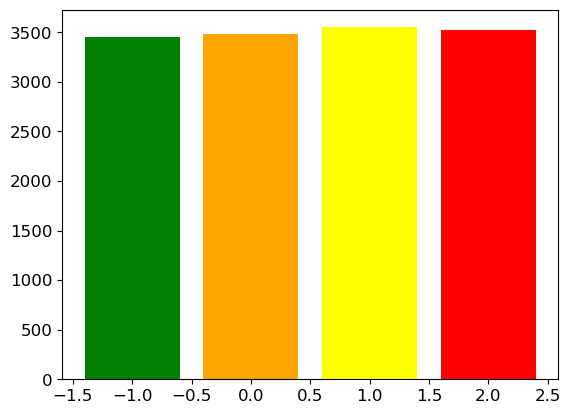

In [176]:
# confirm value in resampled dataset with bar plot
# summarize distribution
counter = Counter(y_train_sm)
for k,v in counter.items():
    per = v / len(y_train_sm) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# plot the resampled distribution
plt.bar(counter.keys(), counter.values(), color=['green', 'orange', 'yellow', 'red'])
plt.show()

In [178]:
# convert sentiment classes from float back to int
y_train_sm.astype(int)

array([-1, -1, -1, ...,  2,  2,  2])

With this level of cleaning concluded, next is the model building and development stage.

# Section 2: Model Development and Analysis

This section describes the steps and processes involved in building models for the project as well as the analysis of the model performance in terms of their accuracy in accomplishing the classification task.

# <a id="five"></a>
## 2.1 Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, the team developed some ... Our choice of models include:

- 1. Logistic Regression
- 2. Support Vector Machines
- 3. Decision Trees Classifier
- 4. RandomForest Classifier
- 5. K-Nearest Neighbours Classifier, and
- 6. Gradient Boosting Classifier
- 7. AdaBoost Classifier
- 8. Naive Bayes Classifier
---
This stage is...

The initial task is to build a base model using the standard (unbalanced) dataset before proceeding to build other model objects using the resampled (balanced) dataset for fitting and prediction processes. Next, functions will be built to train and test the models.

### 2.1.1 Overview of the Selected Models

- 1. Logistic Regression: Logistic regression aims to solve classification problems. It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome. In the simplest case there are two outcomes, which is called binomial, an example of which is predicting if a tumor is malignant or benign. With some parameter variations, this model can be used for multiclass problems as in this example of classifying Twitter sentiments into four different classes - Anti, Neutrals, News, Pro - man-made climate change believers. 


- 2. Support Vector Machines:


- 3. Decision Trees Classifier:


- 4. Random Forest Classifier: A random forest is a powerful non-parametric algorithm that is an example of an ensemble method built on decision trees, meaning that it relies on aggregating the results of an ensemble of decision trees. The ensemble of trees are randomized and the output is the mode of the classes (classification) or mean prediction (regression) of the individual trees.


- 5. K-Nearest Neighbours Classifier:


- 6. Gradient Boosting Classifier:


- 7. AdaBoost Classifier:


- 8. Naive-Bayes Classifier:


Source: Explore (2022): _Advanced Classification Train materials_ for 2207ACDS Cohort"

#### Fit, Train and Predict with a base model on the standard dataset

In [179]:
# run a Logistic Regression base model on the standard dataset
lgr_base = LogisticRegression() # instantiate model object
lgr_train = lgr_base.fit(X_train, y_train.ravel()) #fit model to unbalanced data
lgr_predict = lgr_train.predict(X_valid) # make prediction on validation dataset
lgr_predict_test = lgr_train.predict(X_test) # make prediction on no_labels test dataset

# print classification report
print(classification_report(y_valid, lgr_predict))

              precision    recall  f1-score   support

          -1       0.70      0.25      0.37       315
           0       0.56      0.31      0.40       607
           1       0.69      0.86      0.76      2139
           2       0.67      0.62      0.65       894

    accuracy                           0.67      3955
   macro avg       0.65      0.51      0.54      3955
weighted avg       0.66      0.67      0.65      3955



- For `recall` i.e. the ability of the classifier to find all positive instances, the model performs poorly for the minority classes - `-1(Anti climate change): 0.26`, `0(Neutrals): 0.32` - and slightly above random guess for the other minority class, `2(Climate change news): 0.62`. However, it has a just-acceptable recall on the majority class `1(Climate change believers): 0.86`. 

- The `precision scores` i.e. the ability of the classifier not to label an instance positive when it is actually negative, the model scores are average between `0.54 and 0.69` across the classes while its `f1 scores` - a weighted harmonic mean of precision and recall - follow the same poor-to-fair prediction pattern as in `recall`, according to the class weights.

In [217]:
# Create model objects for our different classifier models 

# Model 1
lgr = LogisticRegression(multi_class='multinomial', max_iter=10000, random_state=42)

# Model 2
svm = SVC(kernel='rbf', decision_function_shape='ovo', probability=True, 
          class_weight='balanced', random_state=42)

# Model 3: decision tree classifier
dtc = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Model 4: random forest model with specified parameters 
# including a class weight for cost-sensitive learning (resampling)
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

# Model 5
knc = KNeighborsClassifier(n_neighbors=3) #  k ~ sqrt(X_train_sm)/2 and should be a odd number

# Model 6
gbc = GradientBoostingClassifier(n_estimators=70, learning_rate=0.02,
                                 max_depth=3,random_state=42)

# Model 7
abc = AdaBoostClassifier(random_state=42)

# Model 8
nbc = MultinomialNB()

### 2.1.2 Building functions for training and testing the datasets

In [71]:
# create a function to train our models
def train_model(model, X, y):

    ''' returns a model trained on the training dataset
        parameters:
            model:   a machine learning model
            X: a training set of independent features 
                - X_train, X_train_sm or X_valid
            y: values of the target variable for training 
                - y_train or y_valid
    '''    
    return model.fit(X, y)

In [164]:
# Create a function to make predictions
def test_model(model, X):
    
    ''' returns the predictions of a model on the X_validation set 
        after predicting the values of y validation.
        parameters:
            model:  a machine learning model
            X:      validation or test set of features
    '''          
    res = model.predict(X)
    return res.astype(int)

### 2.1.3 Model Fitting, Training and Predictions of the Tweet Classes with unseen datasets

The models are fitted and trained on the balanced datasets and can then be used for predicting the tweet classification task on the unseen dataset. The process using the trained models by calling on built functions. First, the prediction is done on the validation dataset and then on the blind test dataset for Kaggle submission.

#### Model 1: Logistic Regression

In [73]:
# training the logistic regression on balanced data
lgr_sm = train_model(lgr, X_train_sm, y_train_sm)

In [74]:
# predict with validation using balanced
lgr_sm_pred_val = test_model(lgr_sm, X_valid)

In [165]:
# Call the function to give model predictions on test dataset
lgr_sm_pred_test = test_model(lgr_sm, X_test)  # Predicting the Tweet Classes with unseen datasets (balanced)

#### Model 2: Support Vector Machine/Support Vector Classifier

In [76]:
# training the support vector machine on balanced data
svm_sm = train_model(svm, X_train_sm, y_train_sm)

In [77]:
# predict for the support vector machine on balanced data
svm_sm_pred_val = test_model(svm_sm, X_valid)

In [166]:
# Call the function to give model predictions on test dataset
svm_sm_pred_test = test_model(svm_sm, X_test)

#### Model 3: Decision Tree Classifier

In [79]:
# training a decision tree on balanced data
dtc_sm = train_model(dtc, X_train_sm, y_train_sm)

In [80]:
# predict a decision tree on balanced data
dtc_sm_pred_val = test_model(dtc_sm, X_valid)

In [81]:
# Call the function to give model predictions on test dataset
dtc_sm_pred_test = test_model(dtc_sm, X_test)

#### Model 4: Random Forest Classifier

In [82]:
# training the random forest classifier on balanced data
rfc_sm = train_model(rfc, X_train_sm, y_train_sm)

In [83]:
# predicting with the validation set
rfc_sm_pred_val = test_model(rfc_sm, X_valid)

In [84]:
# predicting with the test set
rfc_sm_pred_test = test_model(rfc_sm, X_test)

#### Model 5: K-Nearest Neighbors Classifier

In [85]:
# training with k-nearest neighbour classifier
knc_sm = train_model(knc, X_train_sm, y_train_sm)

In [86]:
# predicting with the validation set
knc_sm_pred_val = test_model(knc_sm, X_valid)

In [87]:
# predicting with the test set
knc_sm_pred_test = test_model(knc_sm, X_test)

#### Model 6: Gradient Boosting Classifier

In [88]:
# training with Gradient Boost classifier
gbc_sm = train_model(gbc, X_train_sm, y_train_sm)

In [89]:
# predicting with the validation set
gbc_sm_pred_val = test_model(gbc_sm, X_valid)

In [90]:
# predicting with the test set
gbc_sm_pred_test = test_model(gbc_sm, X_test)

#### Model 7: AdaBoost Classifier

In [205]:
# training with AdaBoost classifier
abc_sm = train_model(abc, X_train_sm, y_train_sm)

In [206]:
# predicting with the validation set
abc_sm_pred_val = test_model(abc_sm, X_valid)

In [207]:
# predicting with the test set
abc_sm_pred_test = test_model(abc_sm, X_test)

#### Model 8: Naive-Bayes Classifier

In [208]:
# training with AdaBoost classifier
nbc_sm = train_model(nbc, X_train_sm, y_train_sm)

In [209]:
# predicting with the validation set
nbc_sm_pred_val = test_model(nbc_sm, X_valid)

In [210]:
# predicting with the test set
nbc_sm_pred_test = test_model(nbc_sm, X_test)

#### Extracting Results for Submission - Kaggle

In [212]:
#create a Kaggle submission file for the model
results_dict = pd.DataFrame({'tweetid':df_test['tweetid'],
                'sentiment': nbc_sm_pred_test})

results_dict.to_csv('submission_nbc_sm.csv', index = False)

#### Extracting pkl file for web app development

In [ ]:
# pickle/save base model for Streamlit web deployment
model_save_path = "svm_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svm,file)

<a id="six"></a>
## 2.2 Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we will compare the relative performance of the various ... |

---
The following metrics will be used to check the model performance using functions:
- roc_auc score,
- a confusion matrix,
- accuracy score,
- classification report which includes the precision score, recall score, and f1 score and can be viewed side-by-side.

**roc_auc score**: The receiver operating characteristic (roc) and area under curve (auc) are

**Confusion Matrix**: Confusion matrices represent counts from predicted and actual values that exist for different classes predicted by the model which is also referred to as the Error matrix . One of the most commonly used metrics while performing classification is accuracy. The accuracy of a model (through a confusion matrix) is calculated using the given formula below. Accuracy=TN+TP /TN+FP+FN+TP.


### 2.2.1 Model Scores, Matrices and Heatmaps
A function is built to take care of the `roc_auc_score` calculation.

In [91]:
# define a function for calculating roc scores
def roc_score(model, X_valid, y_valid):    
    # with the model previously instantiated, 
    # predict the probabilities
    model_prob = model.predict_proba(X_valid)
    
    # get scores and return result
    res = float(roc_auc_score(y_valid, model_prob, multi_class='ovr'))

    return res

#### 2.2.1.1 Scores and Matrices of models trained on the balanced training dataset

#### Model 1: Logistic Regression

In [92]:
# print roc_score for lgr model
lgr_roc = roc_score(lgr_sm, X_valid, y_valid)
print(lgr_roc)

0.8280251578863991


In [93]:
# get model accuracy for the LGR Model
print("Training Accuracy :", lgr_sm.score(X_train_sm, y_train_sm))
print("Validation Accuracy :", lgr_sm.score(X_valid, y_valid))

# confusion matrix
labels = ['-1: Anti', '0: Neutral', '1: Pro', '2: News']
c_matrix_lgr_sm = pd.DataFrame(data=
                               confusion_matrix(y_valid, lgr_sm_pred_val), 
                               index=labels, columns=labels)
print(c_matrix_lgr_sm)

# classification report
class_rep_lgr_sm = classification_report(y_valid, lgr_sm_pred_val, 
                                         target_names=['-1: Anti', '0: Neutral', 
                                                       '1: Pro', '2: News'])
print(class_rep_lgr_sm)

Training Accuracy : 0.7176428571428571
Validation Accuracy : 0.6116308470290771
            -1: Anti  0: Neutral  1: Pro  2: News
-1: Anti         170          68      51       26
0: Neutral       108         302     118       79
1: Pro           194         292    1307      346
2: News           89          65     100      640
              precision    recall  f1-score   support

    -1: Anti       0.30      0.54      0.39       315
  0: Neutral       0.42      0.50      0.45       607
      1: Pro       0.83      0.61      0.70      2139
     2: News       0.59      0.72      0.64       894

    accuracy                           0.61      3955
   macro avg       0.53      0.59      0.55      3955
weighted avg       0.67      0.61      0.63      3955



#### Model 2: Support Vector Classifier

In [94]:
# print roc_score for svm model
svm_roc = roc_score(svm_sm, X_valid, y_valid)
print(svm_roc)

0.8405986936508372


In [95]:
# get model accuracy for the SVM/SVC Model
print("Training Accuracy :", svm_sm.score(X_train_sm, y_train_sm))
print("Validation Accuracy :", svm_sm.score(X_valid, y_valid))

# confusion matrix
c_matrix_svm_sm = pd.DataFrame(data=
                               confusion_matrix(y_valid, svm_sm_pred_val), 
                               index=labels, columns=labels)
print(c_matrix_svm_sm)

# classification report
class_rep_svm_sm = classification_report(y_valid, svm_sm_pred_val, 
                                         target_names=['-1: Anti', '0: Neutral', 
                                                       '1: Pro', '2: News'])
print(class_rep_svm_sm)

Training Accuracy : 0.8811428571428571
Validation Accuracy : 0.6657395701643489
            -1: Anti  0: Neutral  1: Pro  2: News
-1: Anti         129          60     107       19
0: Neutral        60         277     198       72
1: Pro            69         205    1562      303
2: News           41          45     143      665
              precision    recall  f1-score   support

    -1: Anti       0.43      0.41      0.42       315
  0: Neutral       0.47      0.46      0.46       607
      1: Pro       0.78      0.73      0.75      2139
     2: News       0.63      0.74      0.68       894

    accuracy                           0.67      3955
   macro avg       0.58      0.58      0.58      3955
weighted avg       0.67      0.67      0.67      3955



#### Model 3: Decision Tree Classifier

In [96]:
# print roc_score for dtc model
dtc_roc = roc_score(dtc_sm, X_valid, y_valid)
print(dtc_roc)

0.6995415641497832


In [97]:
# get model accuracy for dtc
print("Training Accuracy :", dtc_sm.score(X_train_sm, y_train_sm))
print("Validation Accuracy :", dtc_sm.score(X_valid, y_valid))

# confusion matrix
c_matrix_dtc_sm = pd.DataFrame(data=
                               confusion_matrix(y_valid, dtc_sm_pred_val), 
                               index=labels, columns=labels)
print(c_matrix_dtc_sm)

# classification report
class_rep_dtc_sm = classification_report(y_valid, dtc_sm_pred_val, 
                                         target_names=['-1: Anti', '0: Neutral', 
                                                       '1: Pro', '2: News'])
print(class_rep_dtc_sm)

Training Accuracy : 0.9742857142857143
Validation Accuracy : 0.5810366624525917
            -1: Anti  0: Neutral  1: Pro  2: News
-1: Anti         124          73      83       35
0: Neutral        63         311     155       78
1: Pro           166         318    1271      384
2: News           41         122     139      592
              precision    recall  f1-score   support

    -1: Anti       0.31      0.39      0.35       315
  0: Neutral       0.38      0.51      0.43       607
      1: Pro       0.77      0.59      0.67      2139
     2: News       0.54      0.66      0.60       894

    accuracy                           0.58      3955
   macro avg       0.50      0.54      0.51      3955
weighted avg       0.62      0.58      0.59      3955



#### Model 4: Random Forest Classifier

In [98]:
# print roc_score for rfc model
rfc_roc = roc_score(rfc_sm, X_valid, y_valid)
print(rfc_roc)

0.8327782296572679


In [99]:
# get model accuracy for rfc
print("Training Accuracy :", rfc_sm.score(X_train_sm, y_train_sm))
print("Validation Accuracy :", rfc_sm.score(X_valid, y_valid))

# confusion matrix
c_matrix_rfc_sm = pd.DataFrame(data=
                               confusion_matrix(y_valid, rfc_sm_pred_val), 
                               index=labels, columns=labels)
print(c_matrix_rfc_sm)

# classification report
class_rep_rfc_sm = classification_report(y_valid, rfc_sm_pred_val, 
                                         target_names=['-1: Anti', '0: Neutral', 
                                                       '1: Pro', '2: News'])
print(class_rep_rfc_sm)

Training Accuracy : 0.9742857142857143
Validation Accuracy : 0.6230088495575221
            -1: Anti  0: Neutral  1: Pro  2: News
-1: Anti         132          87      69       27
0: Neutral        50         344     138       75
1: Pro           134         287    1319      399
2: News           31          93     101      669
              precision    recall  f1-score   support

    -1: Anti       0.38      0.42      0.40       315
  0: Neutral       0.42      0.57      0.49       607
      1: Pro       0.81      0.62      0.70      2139
     2: News       0.57      0.75      0.65       894

    accuracy                           0.62      3955
   macro avg       0.55      0.59      0.56      3955
weighted avg       0.66      0.62      0.63      3955



#### Model 5: K-Nearest Neighbors Classifier

In [100]:
# print roc_score for knc model
knc_roc = roc_score(knc_sm, X_valid, y_valid)
print(knc_roc)

0.70289221186334


In [101]:
# get model accuracy for knc
print("Training Accuracy :", knc_sm.score(X_train_sm, y_train_sm))
print("Validation Accuracy :", knc_sm.score(X_valid, y_valid))

# confusion matrix
c_matrix_knc_sm = pd.DataFrame(data=
                               confusion_matrix(y_valid, knc_sm_pred_val), 
                               index=labels, columns=labels)
print(c_matrix_knc_sm)

# classification report
class_rep_knc_sm = classification_report(y_valid, knc_sm_pred_val, 
                                         target_names=['-1: Anti', '0: Neutral', 
                                                       '1: Pro', '2: News'])
print(class_rep_knc_sm)

Training Accuracy : 0.7417857142857143
Validation Accuracy : 0.39494310998735777
            -1: Anti  0: Neutral  1: Pro  2: News
-1: Anti         220          69       7       19
0: Neutral       245         284      25       53
1: Pro           757         611     547      224
2: News          186         164      33      511
              precision    recall  f1-score   support

    -1: Anti       0.16      0.70      0.26       315
  0: Neutral       0.25      0.47      0.33       607
      1: Pro       0.89      0.26      0.40      2139
     2: News       0.63      0.57      0.60       894

    accuracy                           0.39      3955
   macro avg       0.48      0.50      0.40      3955
weighted avg       0.68      0.39      0.42      3955



#### Model 6: Gradient Boosting Classifier

In [102]:
# print roc_score for gbc model
gbc_roc = roc_score(gbc_sm, X_valid, y_valid)
print(gbc_roc)

0.731518007895118


In [103]:
# get model accuracy for gbc
print("Training Accuracy :", gbc_sm.score(X_train_sm, y_train_sm))
print("Validation Accuracy :", gbc_sm.score(X_valid, y_valid))

# confusion matrix
c_matrix_gbc_sm = pd.DataFrame(data=
                               confusion_matrix(y_valid, gbc_sm_pred_val), 
                               index=labels, columns=labels)
print(c_matrix_gbc_sm)

# classification report
class_rep_gbc_sm = classification_report(y_valid, gbc_sm_pred_val, 
                                         target_names=['-1: Anti', '0: Neutral', 
                                                       '1: Pro', '2: News'])
print(class_rep_gbc_sm)

Training Accuracy : 0.4937857142857143
Validation Accuracy : 0.5656131479140328
            -1: Anti  0: Neutral  1: Pro  2: News
-1: Anti          89          79     137       10
0: Neutral        51         256     249       51
1: Pro           121         205    1495      318
2: News           22          67     408      397
              precision    recall  f1-score   support

    -1: Anti       0.31      0.28      0.30       315
  0: Neutral       0.42      0.42      0.42       607
      1: Pro       0.65      0.70      0.68      2139
     2: News       0.51      0.44      0.48       894

    accuracy                           0.57      3955
   macro avg       0.48      0.46      0.47      3955
weighted avg       0.56      0.57      0.56      3955



#### Model 7: AdaBoost Classifier

In [187]:
# print roc_score for gbc model
abc_roc = roc_score(abc_sm, X_valid, y_valid)
print(abc_roc)

0.7190483025301462


In [191]:
# get model accuracy for gbc
print("Training Accuracy :", abc_sm.score(X_train_sm, y_train_sm))
print("Validation Accuracy :", abc_sm.score(X_valid, y_valid))

# confusion matrix
c_matrix_abc_sm = pd.DataFrame(data=
                               confusion_matrix(y_valid, abc_sm_pred_val), 
                               index=labels, columns=labels)
print(c_matrix_abc_sm)

# classification report
class_rep_abc_sm = classification_report(y_valid, abc_sm_pred_val, 
                                         target_names=['-1: Anti', '0: Neutral', 
                                                       '1: Pro', '2: News'])
print(class_rep_abc_sm)

Training Accuracy : 0.5227857142857143
Validation Accuracy : 0.4326169405815424
            -1: Anti  0: Neutral  1: Pro  2: News
-1: Anti         103         164      34       14
0: Neutral        51         427      72       57
1: Pro           128         897     719      395
2: News           35         350      47      462
              precision    recall  f1-score   support

    -1: Anti       0.32      0.33      0.33       315
  0: Neutral       0.23      0.70      0.35       607
      1: Pro       0.82      0.34      0.48      2139
     2: News       0.50      0.52      0.51       894

    accuracy                           0.43      3955
   macro avg       0.47      0.47      0.41      3955
weighted avg       0.62      0.43      0.45      3955



#### Model 8: Naive-Bayes Classifier

In [213]:
# print roc_score for Naive Bayes model
nbc_roc = roc_score(nbc_sm, X_valid, y_valid)
print(nbc_roc)

0.812011145456393


In [214]:
# get model accuracy for Naive Bayes Classifier
print("Training Accuracy :", nbc_sm.score(X_train_sm, y_train_sm))
print("Validation Accuracy :", nbc_sm.score(X_valid, y_valid))

# confusion matrix
c_matrix_nbc_sm = pd.DataFrame(data=
                               confusion_matrix(y_valid, nbc_sm_pred_val), 
                               index=labels, columns=labels)
print(c_matrix_nbc_sm)

# classification report
class_rep_abc_sm = classification_report(y_valid, abc_sm_pred_val, 
                                         target_names=['-1: Anti', '0: Neutral', 
                                                       '1: Pro', '2: News'])
print(class_rep_abc_sm)

Training Accuracy : 0.6309285714285714
Validation Accuracy : 0.5431099873577749
            -1: Anti  0: Neutral  1: Pro  2: News
-1: Anti         174          69      43       29
0: Neutral       106         300     119       82
1: Pro           267         393    1033      446
2: News           70          71     112      641
              precision    recall  f1-score   support

    -1: Anti       0.32      0.33      0.33       315
  0: Neutral       0.23      0.70      0.35       607
      1: Pro       0.82      0.34      0.48      2139
     2: News       0.50      0.52      0.51       894

    accuracy                           0.43      3955
   macro avg       0.47      0.47      0.41      3955
weighted avg       0.62      0.43      0.45      3955



#### 2.2.1.2 Building Factsheets of the ROC_AUC and F1 metrics across all the models

In [218]:
# create lists of model labels and the result of roc_auc scores
# create a dictionary from the lists using list comprehension
model_labels = ['lgr', 'svm', 'dtc', 'rfc', 'knc', 'gbc', 'abc', 'nbc']
model_roc_auc = [lgr_roc, svm_roc, dtc_roc, rfc_roc, knc_roc, gbc_roc, abc_roc, nbc_roc]
model_roc_dict = {model_labels[i]: model_roc_auc[i] for i in range(len(model_labels))}

# show the roc_auc score results in a dataframe
roc_factsheet = pd.DataFrame(data=model_roc_dict, index=labels)
roc_factsheet.head()

,lgr,svm,dtc,rfc,knc,gbc,abc,nbc
-1: Anti,0.828025,0.840599,0.699542,0.832778,0.702892,0.731518,0.719048,0.812011
0: Neutral,0.828025,0.840599,0.699542,0.832778,0.702892,0.731518,0.719048,0.812011
1: Pro,0.828025,0.840599,0.699542,0.832778,0.702892,0.731518,0.719048,0.812011
2: News,0.828025,0.840599,0.699542,0.832778,0.702892,0.731518,0.719048,0.812011


In [219]:
# create a list of model labels
model_labels = ['lgr', 'svm', 'dtc', 'rfc', 'knc', 'gbc', 'abc', 'nbc']

# create a function to get f1 scores from all the models
def get_f1(y, y_pred):
    return f1_score(y, y_pred, average=None)

# create a dictionary to store the values of the calculated f1 scores
models_f1 = {'lgr': get_f1(y_valid, lgr_sm_pred_val),
            'svm': get_f1(y_valid, svm_sm_pred_val),
            'dtc': get_f1(y_valid, dtc_sm_pred_val),
            'rfc': get_f1(y_valid, rfc_sm_pred_val),
            'knc': get_f1(y_valid, knc_sm_pred_val),
            'gbc': get_f1(y_valid, gbc_sm_pred_val),
            'abc': get_f1(y_valid, abc_sm_pred_val),
            'nbc': get_f1(y_valid, nbc_sm_pred_val), 
            }

# show the f1 results in a dataframe
f1_factsheet = pd.DataFrame(data=models_f1, index=labels)
f1_factsheet.head()

,lgr,svm,dtc,rfc,knc,gbc,abc,nbc
-1: Anti,0.388128,0.420195,0.349788,0.398792,0.255369,0.289474,0.325949,0.373391
0: Neutral,0.452774,0.463987,0.434661,0.485190,0.327378,0.416118,0.349284,0.416667
1: Pro,0.703634,0.752953,0.671244,0.700478,0.397674,0.673456,0.477582,0.599536
2: News,0.644836,0.681004,0.597075,0.648256,0.600823,0.472705,0.507135,0.612811


#### 2.2.1.3 Plotting Heatmaps to visualize the performance metrics - confusion matrix of the best model

Visualize the performance (confusion matrix) of the best performing model.

Text(49.72222222222221, 0.5, 'True')

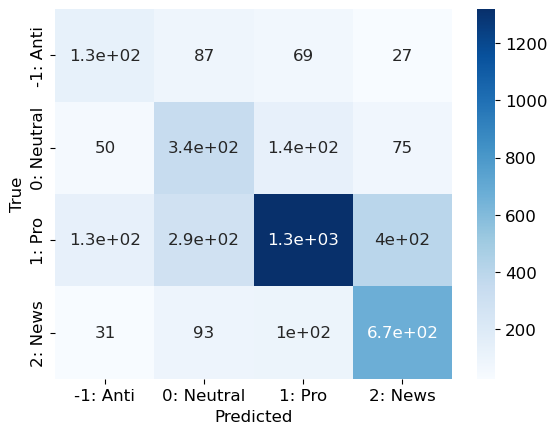

In [195]:
# heatmap visual from the confusion matrix
sns.heatmap(np.round(c_matrix_rfc_sm, 2), annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### 2.2.2 Improving model performance

The results above show poor performances recorded on the `-1: Anti` and `0: Neutral` classes across all models. This is understandable since these two classes (unlike the `1: Pro` and `2: News` classes) have fewer observations from the training dataset as well as the test dataset. Although the training dataset was resampled to provide better prediction accuracies, the unseen dataset is obviously still imbalanced as is expected in the real world.

#### Implementing Hyperparameter tuning to improve model performance

The following hyperparameter spaces are defined as python dictionaries for the Logistic Regression, the Support Vector Classifier and the Decision Trees Algorithms used across the selected models.
    

In [129]:
# Defining parameter space for Logistic Regression
log_param = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
           'penalty':['l2'],
           'C':[100, 10, 1.0, 0.1]}

In [122]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [196]:
# Defining hyperparameter space for the SVC
parameters = {'kernel':('rbf'),
              'C':(0.25,1.0),
              'gamma': (1,2)}

In [197]:
# Defining 3-dimensional hyperparameter space for Decision Trees
# as a Python dictionary
hyperparameter_space = {'max_depth':[2,4,6,8,10,12,15,20,25], 
                        'min_samples_leaf':[1,2,4,6,8,10,20],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

##### First with GridSearchCV - Logistic Regression and SVM

Using Logistic Regression

In [130]:
# instantiate the grid search for LogReg
#sk_folds = StratifiedKFold(n_splits=5, random_state=40, shuffle=True)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
lgr_gs = GridSearchCV(estimator=lgr_sm, param_grid=log_param, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)


In [131]:
# fit function on grid search
lgr_gs = lgr_gs.fit(X_train_sm, y_train_sm)
print("Optimal hyperparameters:", lgr_gs.best_params_)
print()
print("Average cross-validated training accuracy score:",
      lgr_gs.best_score_)

/Users/josaramide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/josaramide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/josaramide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/josaramide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/josaramide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/josaramide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/josaramide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/josaramide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/josaramide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/josaramide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/josaramide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/josaramide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Optimal hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

Average cross-validated training accuracy score: 0.6720238095238096


In [133]:
lgr_gs_sm = lgr_gs.best_estimator_
lgr_gs_sm = lgr_gs_sm.fit(X_train_sm, y_train_sm)
lgr_gs_pred_val = lgr_gs_sm.predict(X_valid) # Validation Predictions
lgr_gs_pred_test = lgr_gs_sm.predict(X_test) # Test Predictions

print("Validation accuracy:", np.round(accuracy_score(y_valid, lgr_gs_pred_val), 7))

# confusion matrix
c_matrix_lgr_gs = pd.DataFrame(data=confusion_matrix(y_valid, lgr_gs_pred_val), index=labels, columns=labels)
print(c_matrix_lgr_gs)

# classification report
class_rep_lgr_gs = classification_report(y_valid, lgr_gs_pred_val, target_names=['-1: Anti', '0: Neutral', 
                                                                           '1: Pro', '2: News'])
print(class_rep_lgr_gs)


Validation accuracy: 0.6
            -1: Anti  0: Neutral  1: Pro  2: News
-1: Anti         166          67      55       27
0: Neutral       117         297     115       78
1: Pro           210         295    1287      347
2: News           91          66     106      631
              precision    recall  f1-score   support

    -1: Anti       0.28      0.53      0.37       315
  0: Neutral       0.41      0.49      0.45       607
      1: Pro       0.82      0.60      0.70      2139
     2: News       0.58      0.71      0.64       894

    accuracy                           0.60      3955
   macro avg       0.52      0.58      0.54      3955
weighted avg       0.66      0.60      0.62      3955



Using Support Vector Classifier

In [137]:
# Instantiate the Support Vector Classifier GridSearchCV
svm_gs = GridSearchCV(svm, param_grid=parameters, 
                  scoring="accuracy",
                  n_jobs=-1, cv=5, return_train_score=True)
svm_gs = svm_gs.fit(X_train_sm, y_train_sm)

print("Optimal hyperparameters:", svm_gs.best_params_)
print()
print("Average cross-validated training accuracy score:",
      svm_gs.best_score_)

In [ ]:
svm_gs_sm = svm_gs.best_estimator_
svm_gs_sm = svm_gs_sm.fit(X_train_sm, y_train_sm)
svm_gs_pred_val = svm_gs_sm.predict(X_valid) # Validation Predictions
svm_gs_pred_test = svm_gs_sm.predict(X_test) # Test Predictions

print("Validation accuracy:", np.round(accuracy_score(y_valid, svm_gs_pred_val), 2))

# confusion matrix
c_matrix_svm_gs = pd.DataFrame(data=confusion_matrix(y_valid, svm_gs_pred_val), index=labels, columns=labels)
print(c_matrix_svm_gs)

# classification report
class_rep_svm_gs = classification_report(y_valid, svm_gs_pred_val, target_names=['-1: Anti', '0: Neutral', 
                                                                           '1: Pro', '2: News'])
print(class_rep_svm_gs)

##### Then, with RandomizedSearchCV - Random Forest

Using the best performing machine learning model i.e. the Random Forest Model, a Randomized Search can be applied to investigate hyperparameters that can be used to further improve the model performance. The complexity of this process is in the amount of time it takes the algorithm to conclude.

In [198]:
# instantiate the RandomizedSearch method
rfc_rs = RandomizedSearchCV(rfc, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=10,
                        n_jobs=-1, cv=10, return_train_score=True)

In [199]:
# call the fit function built above to fit our model to the resampled dataset
train_model(rfc_rs, X_train_sm, y_train_sm)

# print some outputs for the best parameters
print("Optimal hyperparameters:", rfc_rs.best_params_)
print()
print("Average cross-validated training accuracy score:",
      rfc_rs.best_score_)

COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


Optimal hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 25}

Average cross-validated training accuracy score: 0.6015714285714286


In [200]:
# fit the best estimator to the resampled dataset
rfc_rs_sm = rfc_rs.best_estimator_
rfc_rs_sm = train_model(rfc_rs_sm, X_train_sm, y_train_sm)
rfc_rs_pred_val = test_model(rfc_rs_sm, X_valid) # Validation Predictions
rfc_rs_pred_test = test_model(rfc_rs_sm, X_test) # Test Predictions

In [201]:
print("Validation accuracy:", np.round(accuracy_score(y_valid, rfc_rs_pred_val), 4))

# confusion matrix
c_matrix_rfc_rs = pd.DataFrame(data=confusion_matrix(y_valid, rfc_rs_pred_val), index=labels, columns=labels)
print(c_matrix_rfc_rs)

# classification report
class_rep_rfc_rs = classification_report(y_valid, rfc_rs_pred_val, target_names=['-1: Anti', '0: Neutral', 
                                                                           '1: Pro', '2: News'])
print(class_rep_rfc_rs)

Validation accuracy: 0.5767
            -1: Anti  0: Neutral  1: Pro  2: News
-1: Anti          98          82      73       62
0: Neutral        23         284     127      173
1: Pro            51         263    1168      657
2: News           11          70      82      731
              precision    recall  f1-score   support

    -1: Anti       0.54      0.31      0.39       315
  0: Neutral       0.41      0.47      0.43       607
      1: Pro       0.81      0.55      0.65      2139
     2: News       0.45      0.82      0.58       894

    accuracy                           0.58      3955
   macro avg       0.55      0.54      0.52      3955
weighted avg       0.64      0.58      0.58      3955



In [ ]:
#create a Kaggle submission file for the model
results_dict = pd.DataFrame({'tweetid':df_test['tweetid'],
                'sentiment': rfc_sm_pred_test})

results_dict.to_csv('submission_rfc_new.csv', index = False)

# Section 3: Model Explanations and Conclusions

This section describes

<a id="seven"></a>
## 3.1 Model Explanation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we discuss how the models work in a simple way ...|

---

#### 3.1.1 Understanding the selected models

- 1. **The Logistic Regression Model**: The Logistic regression is a statistical model that uses Logistic function to model the conditional probability. Logistic Regression can be used for binary classification or multi-class classification. Binary classification is when there are two possible outcomes like a person is infected with AIDS or is not infected with AIDS. In multi-class classification, there are multiple outcomes such as an individual having either of flu, or an allergy, or cold or AIDS. Unlike linear regression, assumptions for Logistic Regression are;

            - No outliers in the data. An outlier can be identified by analyzing the independent variables.
            - No correlation (multi-collinearity) between the independent variables.


- 2. **The Support Vector Machine Classification Model**: A support vector machine (SVM) uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text. The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points.Hyperplanes are decision boundaries that help classify the data points.


- 3. The Decision Tree Classification Model:


- 4. **The Random Forest Classification Model**: Random forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.Random forests correct for decision trees' habit of overfitting to their training set. Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees.


- 5. The K-Nearest Neighbours Classification Model:


- 6. The Gradient Boosting Classification Model:




#### 3.1.2 Characteristics of the Best Performing Model 

#### 3.1.3 Advantages of the Best Performing Model 

Advantages of the **Random Forest Classifier** when compared with decision trees include:
- It is more accurate than the decision tree algorithm.
- It provides an effective way of handling missing data.
- It can produce a reasonable prediction without hyper-parameter tuning.
- It solves the issue of overfitting in decision trees.
- In every random forest tree, a subset of features is selected randomly at the node’s splitting point.

The nature of the dataset in that it is imbalanced also presents an advantage for the Random Forest Classifier, an algorith which is able to intuitively assign weights to different classes.

<a id="seven"></a>
## 3.2 Conclusions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we discuss how the best performing model works in a simple way ...|

---

To end the experiment and display its parameters on Comet, the following code is used

In [10]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/teamnd2/classification-predict/20b7a33d5cfc452d9b962afd20c7e6dd
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (868 bytes)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: ---------------------------
COMET INFO: Using '/Users/josaramide/Documents/GitHub/2207ACDS_TEAMND2/.cometml-runs' path as offline directory. Pass 'offline_

Running experiment.display() will show the experiments comet.ml page

In [11]:
experiment.display()

## Appendix - Further Experimentation

### Sentiment Analysis

In [181]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [182]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [183]:
# let's checkout our Negative, Neutral, Positive words and Compound (a combination of the other 3)

df_train['polarity'] = df_train['message_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df_train.tail()

,sentiment,message,tweetid,Username,message_tokens,short_words,message_string,message_string_fdist,message_string_lem,is_equal,polarity
15809,2,the quest to capture and store carbon and slow...,705048,[],"[quest, capture, store, carbon, slow, climate,...",new,quest capture store carbon slow climate change...,quest capture store carbon slow climate change...,quest capture store carbon slow climate change...,True,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp..."
15810,0,this global warming so late in the season is p...,572819,[],"[global, warming, late, season, pretty, annoying]",,global warming late season pretty annoying,global warming late season pretty annoying,global warming late season pretty annoying,True,"{'neg': 0.257, 'neu': 0.286, 'pos': 0.457, 'co..."
15811,1,Retweet stephenschlegel she s thinking about h...,426353,[@StephenSchlegel],"[rt, stephenschlegel, thinking, going, die, hu...",rt die,stephenschlegel thinking going die husband bel...,stephenschlegel thinking going die husband bel...,stephenschlegel thinking going die husband bel...,True,"{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp..."
15812,1,Retweet sierraclub 2016 hottest year in histor...,989478,[@SierraClub],"[rt, sierraclub, 2016, hottest, year, history,...",rt 182,sierraclub 2016 hottest year history also 2016...,sierraclub 2016 hottest year history also 2016...,sierraclub 2016 hottest year history also 2016...,True,"{'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'comp..."
15813,1,Retweet thinkprogress epa head falsely claims ...,442853,[@thinkprogress],"[rt, thinkprogress, epa, head, falsely, claims...",rt epa,thinkprogress epa head falsely claims carbon e...,thinkprogress epa head falsely claims carbon e...,thinkprogress epa head falsely claims carbon e...,True,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp..."
15814,1,Retweet ezlusztig they took down the material ...,22001,[@ezlusztig],"[rt, ezlusztig, took, material, global, warmin...",rt qvc,ezlusztig took material global warming lgbt ri...,ezlusztig took material global warming lgbt ri...,ezlusztig took material global warming lgbt ri...,True,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp..."
15815,2,Retweet washingtonpost how climate change coul...,17856,[@washingtonpost],"[rt, washingtonpost, climate, change, could, b...",rt 200 old,washingtonpost climate change could breaking 2...,washingtonpost climate change could breaking 2...,washingtonpost climate change could breaking 2...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
15816,0,notiven Retweet nytimesworld what does trump a...,384248,[],"[notiven, rt, nytimesworld, trump, actually, b...",rt,notiven nytimesworld trump actually believe cl...,nytimesworld trump actually believe climate ch...,nytimesworld trump actually believe climate ch...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
15817,-1,Retweet sara8smiles hey liberals the climate c...,819732,[@sara8smiles],"[rt, sara8smiles, hey, liberals, climate, chan...",rt hey byã,sara8smiles hey liberals climate change crap h...,sara8smiles hey liberals climate change crap h...,sara8smiles hey liberals climate change crap h...,True,"{'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compou..."
15818,0,Retweet chet_cannon kurteichenwald s climate c...,806319,"[@Chet_Cannon, @kurteichenwald]","[rt, chet_cannon, kurteichenwald, climate, cha...",rt 4,chet_cannon kurteichenwald climate change equa...,kurteichenwald climate change equation,kurteichenwald climate change equation,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


# Transform Data Frame

In [184]:


# Change data structure
df_train2 = pd.concat(
    [df_train.drop(['Username','tweetid', 'polarity', 'short_words'], axis=1), 
     df_train['polarity'].apply(pd.Series)], axis=1)


# Create new variable with sentiment "neutral," "positive" and "negative"
df_train2['sentiment'] = df_train2['compound'].apply(lambda x: 'positive' if (x >0 and x<2) else 'news' if x==2 else 'neutral' if x==0 else 'negative')
df_train2[['compound', 'sentiment']]



,sentiment,message,message_tokens,message_string,message_string_fdist,message_string_lem,is_equal,neg,neu,pos,compound
0,1,polyscimajor epa chief doesn t think carbon di...,"[polyscimajor, epa, chief, think, carbon, diox...",polyscimajor epa chief think carbon dioxide ma...,epa chief think carbon dioxide main cause glob...,epa chief think carbon dioxide main cause glob...,True,0.000,0.849,0.151,0.1531
1,1,it s not like we lack evidence of anthropogeni...,"[like, lack, evidence, anthropogenic, global, ...",like lack evidence anthropogenic global warming,like lack evidence anthropogenic global warming,like lack evidence anthropogenic global warming,True,0.245,0.319,0.436,0.2023
2,2,Retweet rawstory researchers say we have three...,"[rt, rawstory, researchers, say, three, years,...",rawstory researchers say three years act clima...,rawstory researchers say three years act clima...,rawstory researchers say three years act clima...,True,0.000,1.000,0.000,0.0000
3,1,todayinmaker wired 2016 was a pivotal year in ...,"[todayinmaker, wired, 2016, pivotal, year, war...",todayinmaker wired 2016 pivotal year war clima...,wired 2016 pivotal year war climate change,wired 2016 pivotal year war climate change,True,0.394,0.606,0.000,-0.5994
4,1,Retweet soynoviodetodas it s 2016 and a racist...,"[rt, soynoviodetodas, 2016, racist, sexist, cl...",soynoviodetodas 2016 racist sexist climate cha...,2016 racist sexist climate change denying bigo...,2016 racist sexist climate change denying bigo...,True,0.444,0.556,0.000,-0.7506


In [186]:
# Tweet with highest positive sentiment
df_train2.loc[df_train2['compound'].idxmax()].values

array(['positive',
       'Retweet martin_durkin wonderful trump appoints the charming clever sane myron ebell to take on the global warming charlatans hurrah httpã â â',
       list(['rt', 'martin_durkin', 'wonderful', 'trump', 'appoints', 'charming', 'clever', 'sane', 'myron', 'ebell', 'take', 'global', 'warming', 'charlatans', 'hurrah']),
       'martin_durkin wonderful trump appoints charming clever sane myron ebell take global warming charlatans hurrah',
       'martin_durkin wonderful trump appoints charming clever sane myron ebell take global warming charlatans hurrah',
       'martin_durkin wonderful trump appoints charming clever sane myron ebell take global warming charlatans hurrah',
       True, 0.0, 0.364, 0.636, 0.9403], dtype=object)

In [187]:
# Tweet with highest negative sentiment 
df_train2.loc[df_train2['compound'].idxmin()].values

array(['negative',
       'Retweet nasmaraj ok here s my problem with yall there s global warming terrorism rape murder amp war going on but a song is what',
       list(['rt', 'nasmaraj', 'ok', 'problem', 'yall', 'global', 'warming', 'terrorism', 'rape', 'murder', 'amp', 'war', 'going', 'song']),
       'nasmaraj problem yall global warming terrorism rape murder amp war going song',
       'nasmaraj problem yall global warming terrorism rape murder amp war going song',
       'nasmaraj problem yall global warming terrorism rape murder amp war going song',
       True, 0.73, 0.213, 0.057, -0.9682], dtype=object)

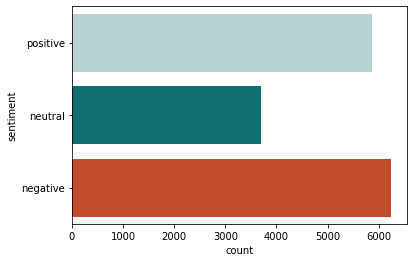

In [188]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=df_train2, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             )

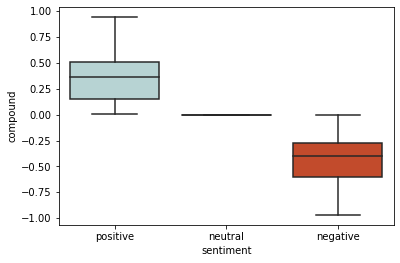

In [189]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df_train2)

In [190]:
df_train2[:].head()

,sentiment,message,message_tokens,message_string,message_string_fdist,message_string_lem,is_equal,neg,neu,pos,compound
0,positive,polyscimajor epa chief doesn t think carbon di...,"[polyscimajor, epa, chief, think, carbon, diox...",polyscimajor epa chief think carbon dioxide ma...,epa chief think carbon dioxide main cause glob...,epa chief think carbon dioxide main cause glob...,True,0.000,0.849,0.151,0.1531
1,positive,it s not like we lack evidence of anthropogeni...,"[like, lack, evidence, anthropogenic, global, ...",like lack evidence anthropogenic global warming,like lack evidence anthropogenic global warming,like lack evidence anthropogenic global warming,True,0.245,0.319,0.436,0.2023
2,neutral,Retweet rawstory researchers say we have three...,"[rt, rawstory, researchers, say, three, years,...",rawstory researchers say three years act clima...,rawstory researchers say three years act clima...,rawstory researchers say three years act clima...,True,0.000,1.000,0.000,0.0000
3,negative,todayinmaker wired 2016 was a pivotal year in ...,"[todayinmaker, wired, 2016, pivotal, year, war...",todayinmaker wired 2016 pivotal year war clima...,wired 2016 pivotal year war climate change,wired 2016 pivotal year war climate change,True,0.394,0.606,0.000,-0.5994
4,negative,Retweet soynoviodetodas it s 2016 and a racist...,"[rt, soynoviodetodas, 2016, racist, sexist, cl...",soynoviodetodas 2016 racist sexist climate cha...,2016 racist sexist climate change denying bigo...,2016 racist sexist climate change denying bigo...,True,0.444,0.556,0.000,-0.7506
